# BOSTON HOUSING Prediction Project - Linear Regression

In [68]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import numpy as np

In [69]:
#Load the dataset

df=pd.read_csv(r"C:\Users\BUGALIA\Downloads\Online courses\Coursera\ML_projects\Boston_Housing_Linear_Regression\Data\housing.csv")

###### EDA

In [70]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null float64
dtypes: float64(4)
memory usage: 15.4 KB


In [72]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


###### EDA Visualization

<Figure size 432x288 with 0 Axes>

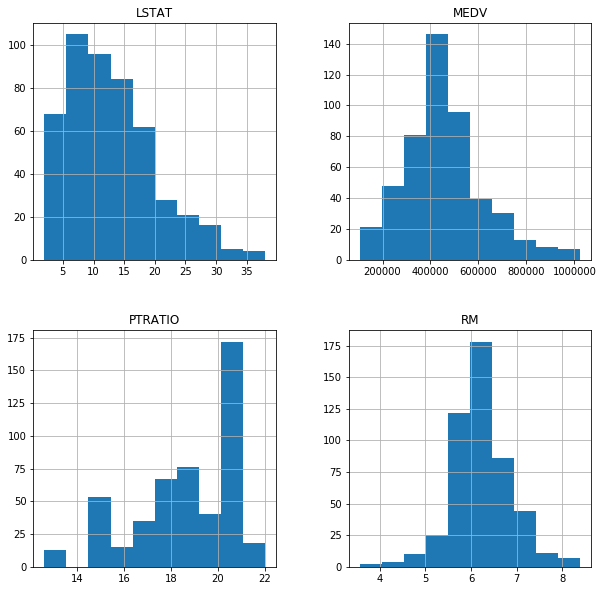

In [73]:
#Histograms

plt.figure()
df.hist(figsize=[10,10])
plt.show()

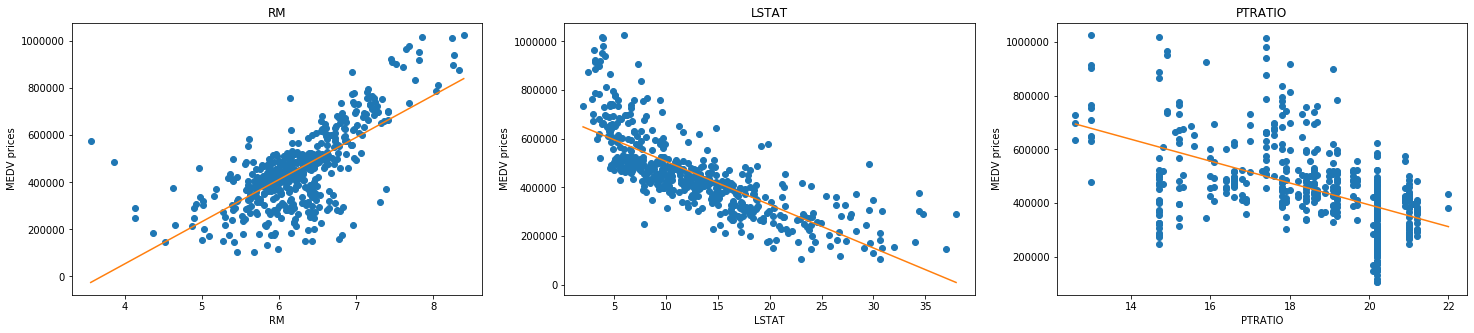

In [104]:
# Using pyplot
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 5))

# i: index
for i, col in enumerate(X.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = X[col]
    y = y
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV prices')

###### correlation

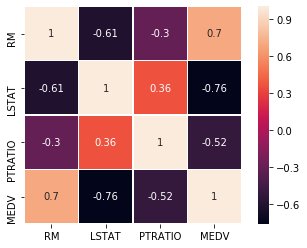

In [74]:
sns.heatmap(df.corr(), square=True, annot=True, linewidths=.5)

###### preprocessing

In [77]:
y=df["MEDV"]
X=df.drop("MEDV", axis=1)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22, test_size=0.3)

In [79]:
#Feature scaling check - igore the target column i.e., MEDV

for col in df.columns:
    print("min:",min(df[col]),"\t", "max:",max(df[col]))

min: 3.5610000000000004 	 max: 8.398
min: 1.98 	 max: 37.97
min: 12.6 	 max: 22.0
min: 105000.0 	 max: 1024800.0


In [80]:
#Standardizing

num_cols=["RM", "LSTAT", "PTRATIO"]
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

for col in num_cols:
    stand=StandardScaler().fit(X_train_copy[[col]])
    X_train_stand[col] = stand.transform(X_train_stand[[col]])
    X_test_stand[col] = stand.transform(X_test_stand[[col]])

In [81]:
X_train_stand.describe()

,RM,LSTAT,PTRATIO
count,3.420000e+02,3.420000e+02,3.420000e+02
mean,1.819857e-15,-1.814663e-16,5.034959e-16
std,1.001465e+00,1.001465e+00,1.001465e+00
min,-4.166609e+00,-1.413837e+00,-2.704140e+00
25%,-5.653386e-01,-7.883030e-01,-7.090023e-01
50%,-7.819710e-02,-1.731255e-01,2.653671e-01
75%,5.251897e-01,5.708180e-01,8.221496e-01
max,3.355509e+00,3.433016e+00,1.657323e+00


###### Modeling

In [86]:
#Without standardization
reg=LinearRegression()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

In [87]:
#RMSE

print('R2:', reg.score(X_test, y_test))
print("RMSE:{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print(reg.intercept_)
print(reg.coef_)

R2: 0.7445606483826119
RMSE:81388.05708737322
355267.42681680346
[ 92196.03075511 -10206.29646904 -18547.0681063 ]


In [88]:
#With standardization

reg=LinearRegression()
reg.fit(X_train_stand, y_train)
y_pred_stand=reg.predict(X_test_stand)

print('R2:', reg.score(X_test_stand, y_test))
print("RMSE:{}".format(np.sqrt(mean_squared_error(y_test, y_pred_stand))))
print(reg.intercept_)
print(reg.coef_)

R2: 0.7445606483826119
RMSE:81388.05708737322
455018.42105263146
[ 59285.45315447 -73912.0883273  -39973.38547871]


###### K-fold cross-validation

In [93]:
from sklearn.model_selection import cross_val_score

scores=[]
for i in range(3,9):
    cv_scores=cross_val_score(reg, X, y, cv=i)
    print(cv_scores)
    scores.append(np.mean(cv_scores))
    
print("average R2:", np.sqrt(scores))

[ 0.61684363  0.29769577 -0.50876814]
[ 0.72725052  0.62062361  0.65328441 -0.00981309]
[0.75606189 0.63862669 0.39700546 0.28794665 0.03922698]
[ 0.75686762  0.57009413  0.43993858  0.68316935 -0.07633709  0.2148156 ]
[ 0.76099486  0.7117381   0.57590332  0.49808426  0.44619846 -1.41354574
  0.46391111]
[ 0.78146008  0.64087531  0.5639302   0.5462187   0.62361632 -0.29916048
 -0.5298484   0.38041547]
average R2: [0.36777315 0.7055752  0.6509789  0.65682928 0.54027564 0.58175459]


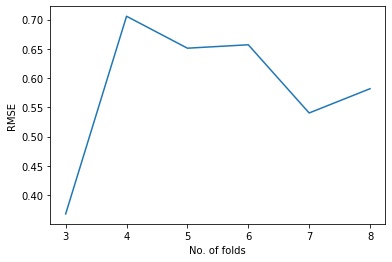

In [96]:
plt.plot(range(3,9), np.sqrt(scores))
plt.xlabel("No. of folds")
plt.ylabel("RMSE")
plt.show()

In [ ]:
###### This notebook shows the implementation of KNN classfication algorithm over IRIS dataset w.r.t.  EDA and modeling.

###### Observations:
###### Using different values of N for knn gives us varying values of accuracy.
###### Choosing low value for number of neihgbors gives underfitting while choosing high value for knn overfits the data.
###### So, it will be better to choose in the middle with the values of N between(3 to 6) or (19,23).

